In [9]:
import numpy as np
import os
import itertools
import glob
import random
import shutil
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import itertools
import cv2

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [10]:
train_path = "C:/Users/mohit/Computer Vision-Image Processing/Hand Gesture Digit Recognition/Sign-Language-Digits/train"
test_path = "C:/Users/mohit/Computer Vision-Image Processing/Hand Gesture Digit Recognition/Sign-Language-Digits/test"
valid_path = "C:/Users/mohit/Computer Vision-Image Processing/Hand Gesture Digit Recognition/Sign-Language-Digits/valid"

In [11]:
# Preprocessing the Images

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)

Found 1712 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


# Model Building

**CNN Model**

In [12]:
# Data Augmentation

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [13]:
model1 = Sequential([
  data_augmentation,
  layers.Conv2D(16, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(32, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [14]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)       

In [15]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
hist1 = model1.fit(train_batches, validation_data=valid_batches, shuffle=True, batch_size=5 , epochs=50)

Epoch 1/50
172/172 [==============================] - 22s 122ms/step - loss: 6.7146 - accuracy: 0.2190 - val_loss: 1.9179 - val_accuracy: 0.3633
Epoch 2/50
172/172 [==============================] - 5s 31ms/step - loss: 1.7412 - accuracy: 0.4060 - val_loss: 1.2849 - val_accuracy: 0.5300
Epoch 3/50
172/172 [==============================] - 5s 31ms/step - loss: 1.3851 - accuracy: 0.5298 - val_loss: 1.0384 - val_accuracy: 0.6200
Epoch 4/50
172/172 [==============================] - 5s 31ms/step - loss: 1.1439 - accuracy: 0.6133 - val_loss: 0.8652 - val_accuracy: 0.6333
Epoch 5/50
172/172 [==============================] - 5s 31ms/step - loss: 0.9982 - accuracy: 0.6653 - val_loss: 0.7007 - val_accuracy: 0.7400
Epoch 6/50
172/172 [==============================] - 5s 30ms/step - loss: 0.9122 - accuracy: 0.6881 - val_loss: 0.6791 - val_accuracy: 0.7433
Epoch 7/50
172/172 [==============================] - 5s 30ms/step - loss: 0.8041 - accuracy: 0.7225 - val_loss: 0.5719 - val_accuracy: 0.79

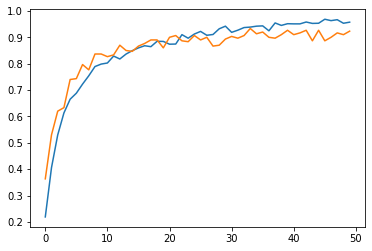

In [17]:
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["val_accuracy"])

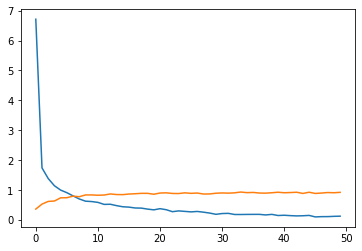

In [18]:
plt.plot(hist1.history["loss"])
plt.plot(hist1.history["val_accuracy"])

In [19]:
pred = model1.predict(test_batches)
y_classes = [np.argmax(i) for i in pred]
y_classes[:10]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
test_batches.class_indices

{'A0': 0,
 'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'A6': 6,
 'A7': 7,
 'A8': 8,
 'A9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 1 0]
 [0 0 0 0 4 1 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 4 1 0 0]
 [0 0 1 0 0 0 0 3 1 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


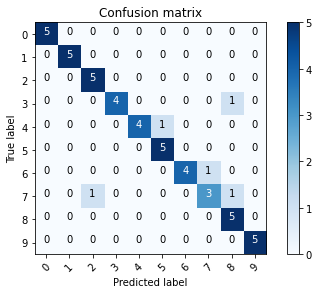

In [22]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(pred, axis=1))
plot_confusion_matrix(cm=cm, classes=[0,1,2,3,4,5,6,7,8,9])

**VGG16 Model**

In [23]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [24]:
model2 = Sequential()
for layer in vgg16_model.layers[:-1]:
    model2.add(layer)
    
for layer in model2.layers:
    layer.trainable = False
    
model2.add(Dense(units=10, activation="softmax"))

In [25]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [26]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
hist2 = model2.fit(x=train_batches, validation_data=valid_batches, shuffle=True, batch_size=5 , epochs=29)

Epoch 1/29
172/172 [==============================] - 28s 141ms/step - loss: 1.5198 - accuracy: 0.4889 - val_loss: 0.9911 - val_accuracy: 0.6967
Epoch 2/29
172/172 [==============================] - 23s 135ms/step - loss: 0.7813 - accuracy: 0.7629 - val_loss: 0.7169 - val_accuracy: 0.8000
Epoch 3/29
172/172 [==============================] - 24s 137ms/step - loss: 0.5769 - accuracy: 0.8400 - val_loss: 0.5852 - val_accuracy: 0.8167
Epoch 4/29
172/172 [==============================] - 24s 138ms/step - loss: 0.4683 - accuracy: 0.8756 - val_loss: 0.5045 - val_accuracy: 0.8567
Epoch 5/29
172/172 [==============================] - 23s 136ms/step - loss: 0.3964 - accuracy: 0.9019 - val_loss: 0.4484 - val_accuracy: 0.8600
Epoch 6/29
172/172 [==============================] - 23s 134ms/step - loss: 0.3466 - accuracy: 0.9095 - val_loss: 0.4141 - val_accuracy: 0.8767
Epoch 7/29
172/172 [==============================] - 24s 140ms/step - loss: 0.3044 - accuracy: 0.9282 - val_loss: 0.3801 - val_ac

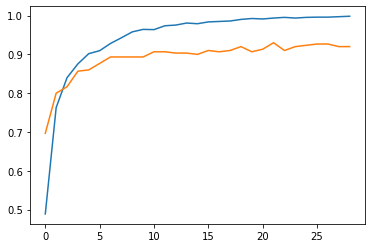

In [28]:
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history["val_accuracy"])

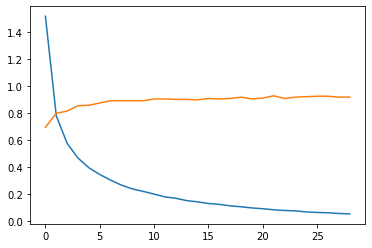

In [29]:
plt.plot(hist2.history["loss"])
plt.plot(hist2.history["val_accuracy"])

In [30]:
pred = model2.predict(test_batches)
y_classes = [np.argmax(i) for i in pred]
y_classes[:10]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 4 0 1 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 2 3 0]
 [0 0 0 0 0 0 0 0 1 4]]


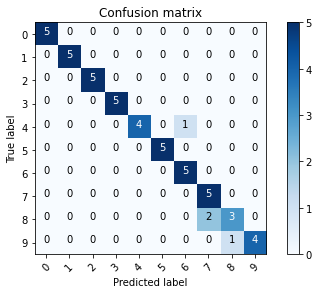

In [31]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=y_classes)
plot_confusion_matrix(cm=cm, classes=[0,1,2,3,4,5,6,7,8,9])

In [32]:
# def predict():
#     cap = cv2.VideoCapture(0)

#     if cap.isOpened():
#         ret, frame = cap.read()
#     img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     #img = cv2.imread(img1)
#     plt.imshow(img)
#     plt.show()
#     #resize = tf.image.resize(img, (50,50))
#     resize = cv2.resize(img, (224,224))
#     #print(np.expand_dims(resize,0).shape)
#     pred = model1.predict(np.expand_dims(resize/255,0))
#     print(pred)
#     y_classes = np.argmax(pred)
#     print(y_classes)

In [33]:
# predict()